Author: Anay Panja

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

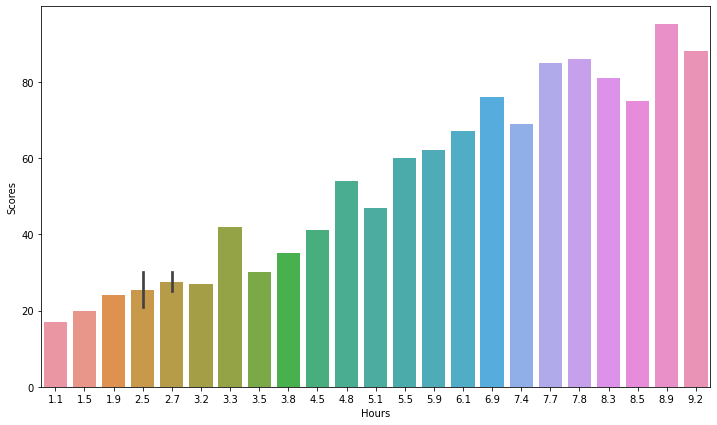

In [5]:
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='Hours',y='Scores',data=data)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

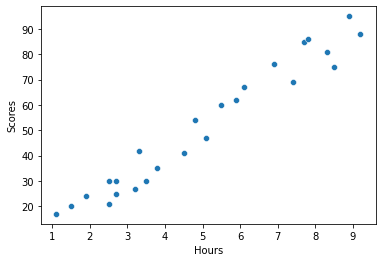

In [6]:
sns.scatterplot(x='Hours',y='Scores',data=data)

# Splitting Data into Independent and Dependent Features

In [7]:
x_data= data.iloc[:,:-1].values
y_data = data.iloc[:,1].values

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


# Model Selection &Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

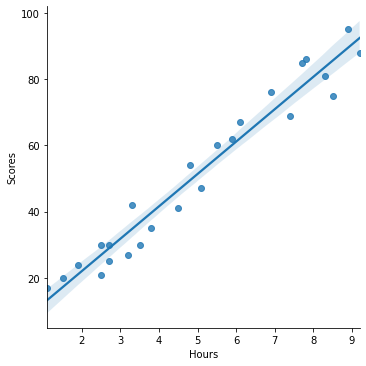

In [11]:
sns.lmplot(x ='Hours', y ='Scores', data = data)

# Making Predictions

In [12]:
y_pred = model.predict(x_test)

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

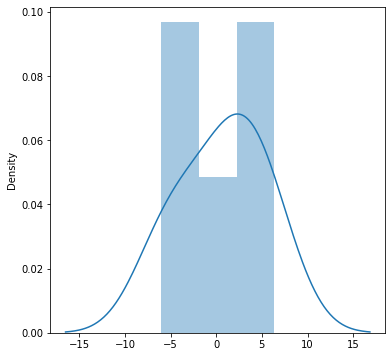

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot(y_test-y_pred,ax=ax)

In [56]:

Comparing_Data = pd.DataFrame({'Actual_Data': y_test, 'Predicted_Data': y_pred})  
Comparing_Data

,Actual_Data,Predicted_Data
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


<AxesSubplot:xlabel='Actual_Data', ylabel='Predicted_Data'>

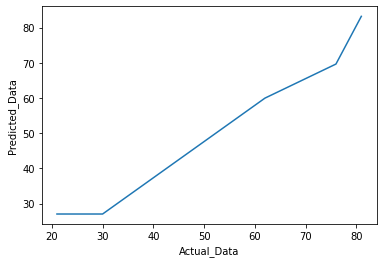

In [60]:
 sns.lineplot(data=Comparing_Data,x='Actual_Data',y='Predicted_Data')

# Testing the model

In [67]:
hours = [[9.25]]
testing = model.predict(hours)
print("****************************** No of Hours = ",hours," **************************")
print("****************************** Predicted Score = ",testing," **************************")

****************************** No of Hours =  [[9.25]]  **************************
****************************** Predicted Score =  [92.38611528]  **************************


# Evaluating the model

In [69]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [70]:
print("Root-mean-square error = ",rmse)


Root-mean-square error =  4.352380006653288
